In [1]:
# Importing all the needed libaries 

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator 
from qiskit.quantum_info import random_unitary
from qiskit.result import marginal_counts
import numpy as np




import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n =  np.random.randint(13)

oracleType, oracleValue = np.random.randint(2),np.random.randint(2)

print(n)

12


In [3]:
if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n)
    print(a)

The oracle returns a balanced function
4086


In [4]:
qr = QuantumRegister(n+1)

cr = ClassicalRegister(n)

In [5]:
circuitName = "DeutschJozsa"
dj = QuantumCircuit(qr,cr)

In [6]:
for i in range (n):
    dj.h(qr[i])

In [7]:
dj.x(qr[n])
dj.h(qr[n])
dj.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=13, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(13, 'q1'), 0), Qubit(QuantumRegister(13, 'q1'), 1), Qubit(QuantumRegister(13, 'q1'), 2), Qubit(QuantumRegister(13, 'q1'), 3), Qubit(QuantumRegister(13, 'q1'), 4), Qubit(QuantumRegister(13, 'q1'), 5), Qubit(QuantumRegister(13, 'q1'), 6), Qubit(QuantumRegister(13, 'q1'), 7), Qubit(QuantumRegister(13, 'q1'), 8), Qubit(QuantumRegister(13, 'q1'), 9), Qubit(QuantumRegister(13, 'q1'), 10), Qubit(QuantumRegister(13, 'q1'), 11), Qubit(QuantumRegister(13, 'q1'), 12)), clbits=())

In [8]:
if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        dj.x(qr[n])
    else:
        dj.iden(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            dj.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
dj.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    dj.h(qr[i])
    
# Measurement
dj.barrier()
for i in range(n):
    dj.measure(qr[i], cr[i])

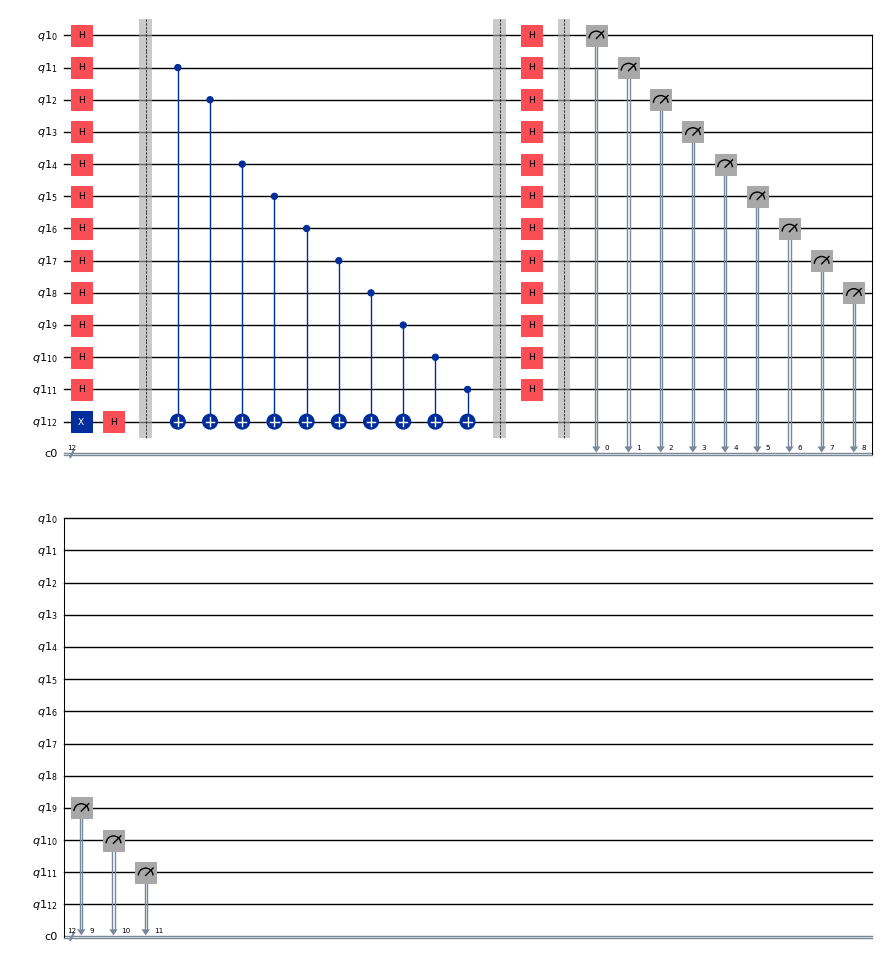

In [9]:
dj.draw(output='mpl',scale=0.5)

{'1': 1024}


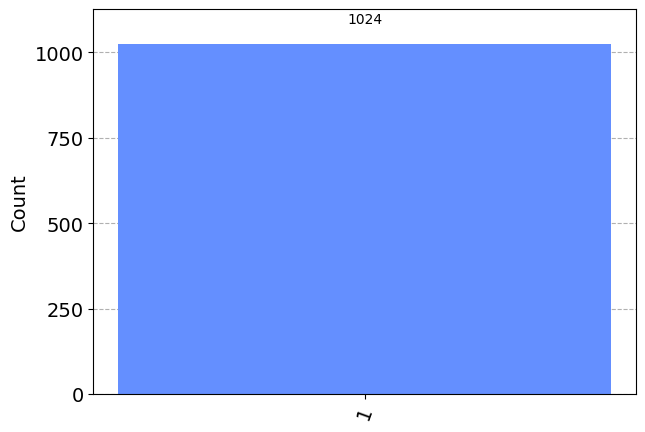

: 

In [10]:
simulator = AerSimulator()
compiled_circuit = transpile(dj, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
counts = result.get_counts()

marginal_result = marginal_counts(result.get_counts(), indices=[2])
print(marginal_result)
plot_histogram(marginal_result)